## Import required packages and load data

In [1]:
# Installing imbalanced-learn
! pip install -U imbalanced-learn

In [2]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Regular EDA (exploratory data analysis) and plotting libraries
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline


#Package for splitting the dataset to training set and test set
from sklearn.model_selection import train_test_split

#Package for Logistic Regression model
from sklearn.linear_model import LogisticRegression

#Package for Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

#Package for Decision Tree model
from sklearn.tree import DecisionTreeClassifier

#Package to handle imbalanced dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Package for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
from dmba import classificationSummary
from dmba import AIC_score

In [2]:
# Loading the data
raw_data = pd.read_csv('FlightDelays.csv')

## Data preprocessing

In [3]:
# Viewing dataframe structure
raw_data.shape

(2201, 13)

2201 observations of 13 rows

In [4]:
# Running the first 10 rows
raw_data.head(10)

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime
5,840,DH,839,JFK,228,1/1/2004,7800,IAD,0,4,1,N687BR,ontime
6,1240,DH,1243,JFK,228,1/1/2004,7806,IAD,0,4,1,N321UE,ontime
7,1645,DH,1644,JFK,228,1/1/2004,7810,IAD,0,4,1,N301UE,ontime
8,1715,DH,1710,JFK,228,1/1/2004,7812,IAD,0,4,1,N328UE,ontime
9,2120,DH,2129,JFK,228,1/1/2004,7814,IAD,0,4,1,N685BR,ontime


In [5]:
#Counting the number of values in each column
raw_data.count()

CRS_DEP_TIME     2201
CARRIER          2201
DEP_TIME         2201
DEST             2201
DISTANCE         2201
FL_DATE          2201
FL_NUM           2201
ORIGIN           2201
Weather          2201
DAY_WEEK         2201
DAY_OF_MONTH     2201
TAIL_NUM         2201
Flight Status    2201
dtype: int64

In [6]:
# Checking for null values
raw_data.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64

Text(0.5, 1.0, 'Empty Data')

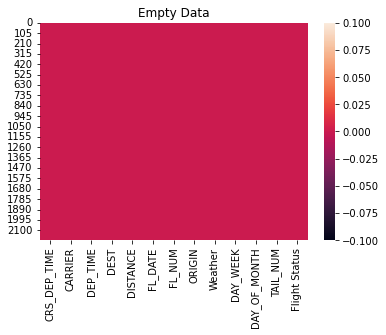

In [7]:
#Plotting null values in our dataset by using heatmap
sns.heatmap(raw_data.isnull())
plt.title("Empty Data")

No missing value in our dataset

In [8]:
# Checking datatype
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


We have 6 string variables, and 7 numerical variables

## Dimensional reduction

In [9]:
# Investigating all the elements whithin each Feature 

for column in raw_data: #create a loop to go through all columns in our dataset
    unique_values = np.unique(raw_data[column]) #take out the unique values
    nr_values = len(unique_values) #number of unique values
    if nr_values <= 10: #if clause to print the outcomes
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature CRS_DEP_TIME is: 59
The number of values for feature CARRIER is: 8 -- ['CO' 'DH' 'DL' 'MQ' 'OH' 'RU' 'UA' 'US']
The number of values for feature DEP_TIME is: 633
The number of values for feature DEST is: 3 -- ['EWR' 'JFK' 'LGA']
The number of values for feature DISTANCE is: 7 -- [169 184 199 213 214 228 229]
The number of values for feature FL_DATE is: 31
The number of values for feature FL_NUM is: 103
The number of values for feature ORIGIN is: 3 -- ['BWI' 'DCA' 'IAD']
The number of values for feature Weather is: 2 -- [0 1]
The number of values for feature DAY_WEEK is: 7 -- [1 2 3 4 5 6 7]
The number of values for feature DAY_OF_MONTH is: 31
The number of values for feature TAIL_NUM is: 549
The number of values for feature Flight Status is: 2 -- ['delayed' 'ontime']


Because the dataset is in only in 1 month January 2014 and we have the DAY_OF_MONTH variable, we can consider removing FL_DATE. The 2 variables FL_NUM and TAIL_NUM do not seem like having any impact on our prediction models. Additionally, we do not need DISTANCE because we already have ORIGIN and DEST (we can use them to calculate distance if required). Furthermore, we will be creating a new dummy variable DELAY_DEP_TIME if the DEP_TIME (actual departure time) - CRS_DEP_TIME > 0 (YES) then assign 1, else (NO) give 0 accordingly.

In [10]:
#Creating new DELAY_DEP_TIME column
raw_data['DELAY_DEP_TIME'] = raw_data['DEP_TIME'] - raw_data['CRS_DEP_TIME']
raw_data.loc[raw_data['DELAY_DEP_TIME'] > 0, 'DELAY_DEP_TIME'] = 1
raw_data.loc[raw_data['DELAY_DEP_TIME'] <= 0, 'DELAY_DEP_TIME'] = 0

In [11]:
#Droping unnecessary columns FL_DATE, FL_NUM, TAIL_NUM,DEP_TIME in the dataset
raw_data.drop(['FL_DATE', 'FL_NUM', 'TAIL_NUM','DEP_TIME','DISTANCE'], axis=1, inplace=True)

In [12]:
# Viewing dataset
raw_data

,CRS_DEP_TIME,CARRIER,DEST,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status,DELAY_DEP_TIME
0,1455,OH,JFK,BWI,0,4,1,ontime,0
1,1640,DH,JFK,DCA,0,4,1,ontime,0
2,1245,DH,LGA,IAD,0,4,1,ontime,0
3,1715,DH,LGA,IAD,0,4,1,ontime,0
4,1039,DH,LGA,IAD,0,4,1,ontime,0
...,...,...,...,...,...,...,...,...,...
2196,645,RU,EWR,DCA,0,6,31,ontime,0
2197,1700,RU,EWR,IAD,0,6,31,ontime,0
2198,1600,RU,EWR,DCA,0,6,31,ontime,0
2199,1359,RU,EWR,DCA,0,6,31,ontime,1


In [13]:
#Renaming column names
raw_data.rename(columns={'Weather': 'WEATHER', 'Flight Status': 'FLIGHT_STATUS', 'DAY_OF_MONTH': 'DAY_MONTH'}, inplace=True)

In [14]:
# Viewing dataset
raw_data

,CRS_DEP_TIME,CARRIER,DEST,ORIGIN,WEATHER,DAY_WEEK,DAY_MONTH,FLIGHT_STATUS,DELAY_DEP_TIME
0,1455,OH,JFK,BWI,0,4,1,ontime,0
1,1640,DH,JFK,DCA,0,4,1,ontime,0
2,1245,DH,LGA,IAD,0,4,1,ontime,0
3,1715,DH,LGA,IAD,0,4,1,ontime,0
4,1039,DH,LGA,IAD,0,4,1,ontime,0
...,...,...,...,...,...,...,...,...,...
2196,645,RU,EWR,DCA,0,6,31,ontime,0
2197,1700,RU,EWR,IAD,0,6,31,ontime,0
2198,1600,RU,EWR,DCA,0,6,31,ontime,0
2199,1359,RU,EWR,DCA,0,6,31,ontime,1


In [15]:
#Listing column names
raw_data.columns

Index(['CRS_DEP_TIME', 'CARRIER', 'DEST', 'ORIGIN', 'WEATHER', 'DAY_WEEK',
       'DAY_MONTH', 'FLIGHT_STATUS', 'DELAY_DEP_TIME'],
      dtype='object')

In [16]:
#Creating hourly bins departure time (original data has 100's of categories) so bining is a musthave to buildup prediction models
raw_data.CRS_DEP_TIME = [round(t / 100) for t in raw_data.CRS_DEP_TIME]

In [17]:
# Viewing dataset
raw_data

,CRS_DEP_TIME,CARRIER,DEST,ORIGIN,WEATHER,DAY_WEEK,DAY_MONTH,FLIGHT_STATUS,DELAY_DEP_TIME
0,15,OH,JFK,BWI,0,4,1,ontime,0
1,16,DH,JFK,DCA,0,4,1,ontime,0
2,12,DH,LGA,IAD,0,4,1,ontime,0
3,17,DH,LGA,IAD,0,4,1,ontime,0
4,10,DH,LGA,IAD,0,4,1,ontime,0
...,...,...,...,...,...,...,...,...,...
2196,6,RU,EWR,DCA,0,6,31,ontime,0
2197,17,RU,EWR,IAD,0,6,31,ontime,0
2198,16,RU,EWR,DCA,0,6,31,ontime,0
2199,14,RU,EWR,DCA,0,6,31,ontime,1


In [18]:
#Rearranging column order
raw_data = raw_data[['CRS_DEP_TIME','DELAY_DEP_TIME', 'CARRIER', 'DEST', 'ORIGIN', 'WEATHER', 'DAY_WEEK',
       'DAY_MONTH', 'FLIGHT_STATUS']]

In [19]:
# Viewing dataset
raw_data

,CRS_DEP_TIME,DELAY_DEP_TIME,CARRIER,DEST,ORIGIN,WEATHER,DAY_WEEK,DAY_MONTH,FLIGHT_STATUS
0,15,0,OH,JFK,BWI,0,4,1,ontime
1,16,0,DH,JFK,DCA,0,4,1,ontime
2,12,0,DH,LGA,IAD,0,4,1,ontime
3,17,0,DH,LGA,IAD,0,4,1,ontime
4,10,0,DH,LGA,IAD,0,4,1,ontime
...,...,...,...,...,...,...,...,...,...
2196,6,0,RU,EWR,DCA,0,6,31,ontime
2197,17,0,RU,EWR,IAD,0,6,31,ontime
2198,16,0,RU,EWR,DCA,0,6,31,ontime
2199,14,1,RU,EWR,DCA,0,6,31,ontime


In [20]:
#Exporting to csv file
raw_data.to_csv(r'E:\Downloads\FlightDelaysTrainingData.csv', index=False)

## Data Exploration

In [21]:
# Investigating all the elements whithin each Feature 

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature CRS_DEP_TIME is: 16
The number of values for feature DELAY_DEP_TIME is: 2 -- [0 1]
The number of values for feature CARRIER is: 8 -- ['CO' 'DH' 'DL' 'MQ' 'OH' 'RU' 'UA' 'US']
The number of values for feature DEST is: 3 -- ['EWR' 'JFK' 'LGA']
The number of values for feature ORIGIN is: 3 -- ['BWI' 'DCA' 'IAD']
The number of values for feature WEATHER is: 2 -- [0 1]
The number of values for feature DAY_WEEK is: 7 -- [1 2 3 4 5 6 7]
The number of values for feature DAY_MONTH is: 31
The number of values for feature FLIGHT_STATUS is: 2 -- ['delayed' 'ontime']


<AxesSubplot:xlabel='FLIGHT_STATUS', ylabel='count'>

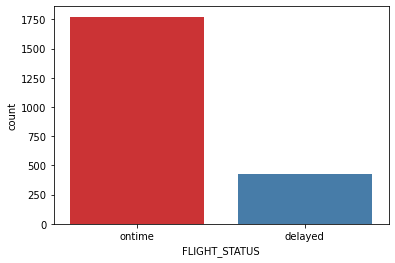

In [22]:
# Investigating the distribution of outcome variable FLIGHT_STATUS
sns.countplot(x = 'FLIGHT_STATUS', data = raw_data, palette = 'Set1')

We can see that the outcome is definitely imbalanced between 'ontime' and 'delay'. Class lable 'ontime' has abnormally high number of observations comparing to class lable 'delayed' (around 5 times). We're gonna solve this problem later to better the models performance.

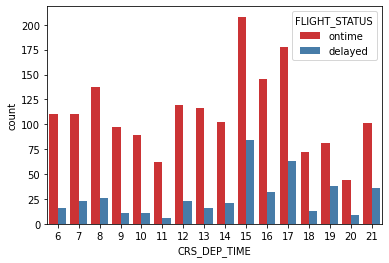

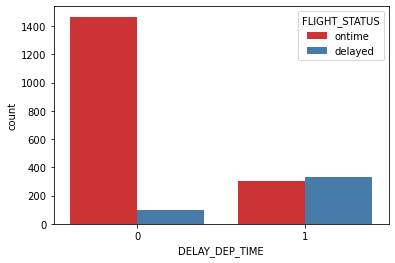

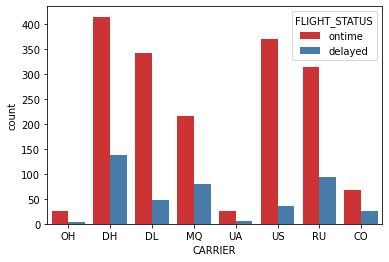

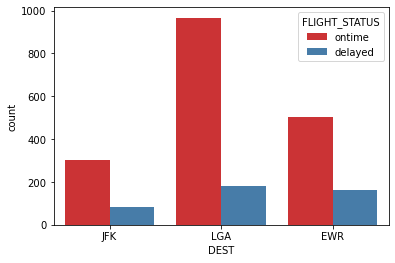

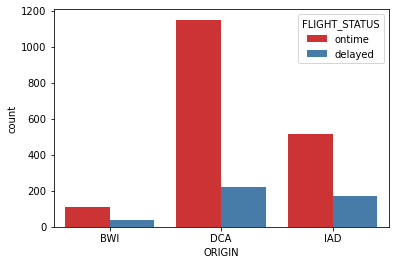

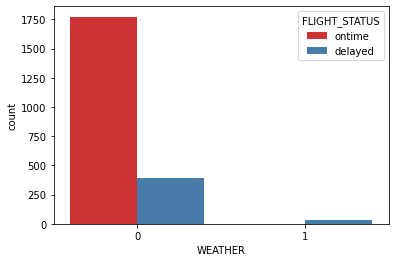

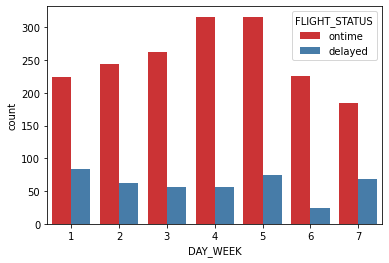

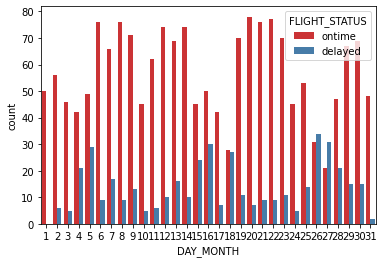

In [23]:
# Looping through all the features by our outcome variable - see if there is a relationship between predictors and outcome

features = ['CRS_DEP_TIME','DELAY_DEP_TIME', 'CARRIER', 'DEST', 'ORIGIN', 'WEATHER', 'DAY_WEEK', 'DAY_MONTH']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set1', hue = 'FLIGHT_STATUS')
    plt.show()

When we compare the countplot of each feature with the distribution of outcome variable FLIGHT_STATUS. According to the shape of the distribution, we can guess that 'CRS_DEP_TIME', 'CARRIER', 'DEST', 'ORIGIN', 'DAY_WEEK' can have greater impact on flight delay prediction.

In [24]:
# Compare FLIGHT_STATUS with DAY_WEEK
pd.crosstab(raw_data.DAY_WEEK, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
DAY_WEEK,,
1,84,224
2,63,244
3,57,263
4,57,315
5,75,316
6,24,226
7,68,185


Monday and Friday have the most flilghts delayed, on the other hand, Saturday has the least

In [25]:
# Compare FLIGHT_STATUS with CARRIER
pd.crosstab(raw_data.CARRIER, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
CARRIER,,
CO,26,68
DH,137,414
DL,47,341
MQ,80,215
OH,4,26
RU,94,314
UA,5,26
US,35,369


In [26]:
# Compare FLIGHT_STATUS with WEATHER
pd.crosstab(raw_data.WEATHER, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
WEATHER,,
0,396,1773
1,32,0


In [27]:
# Compare FLIGHT_STATUS with CRS_DEP_TIME
pd.crosstab(raw_data.CRS_DEP_TIME, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
CRS_DEP_TIME,,
6,16,110
7,23,110
8,26,138
9,11,97
10,11,89
11,6,62
12,23,119
13,16,116
14,21,102


In [28]:
# Compare FLIGHT_STATUS with ORIGIN
pd.crosstab(raw_data.ORIGIN, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
ORIGIN,,
BWI,37,108
DCA,221,1149
IAD,170,516


In [29]:
# Compare FLIGHT_STATUS with DEST
pd.crosstab(raw_data.DEST, raw_data.FLIGHT_STATUS)

FLIGHT_STATUS,delayed,ontime
DEST,,
EWR,161,504
JFK,84,302
LGA,183,967


## Data transformation

In [30]:
# Converting categorical variables into numeric variables
new_raw_data = pd.get_dummies(raw_data, columns = features)

In [31]:
raw_data.shape, new_raw_data.shape

((2201, 9), (2201, 73))

In [32]:
# Converting outcome variable to binary type
new_raw_data['FLIGHT_STATUS'][new_raw_data['FLIGHT_STATUS'] == 'delayed'] = 1
new_raw_data['FLIGHT_STATUS'][new_raw_data['FLIGHT_STATUS'] == 'ontime'] = 0

C:\Users\Admin\AppData\Local\Temp\ipykernel_4172\2321970726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['FLIGHT_STATUS'][new_raw_data['FLIGHT_STATUS'] == 'delayed'] = 1
C:\Users\Admin\AppData\Local\Temp\ipykernel_4172\2321970726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['FLIGHT_STATUS'][new_raw_data['FLIGHT_STATUS'] == 'ontime'] = 0


In [33]:
# Viewing the dataset
new_raw_data

,FLIGHT_STATUS,CRS_DEP_TIME_6,CRS_DEP_TIME_7,CRS_DEP_TIME_8,CRS_DEP_TIME_9,CRS_DEP_TIME_10,CRS_DEP_TIME_11,CRS_DEP_TIME_12,CRS_DEP_TIME_13,CRS_DEP_TIME_14,...,DAY_MONTH_22,DAY_MONTH_23,DAY_MONTH_24,DAY_MONTH_25,DAY_MONTH_26,DAY_MONTH_27,DAY_MONTH_28,DAY_MONTH_29,DAY_MONTH_30,DAY_MONTH_31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2199,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [34]:
new_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FLIGHT_STATUS     2201 non-null   object
 1   CRS_DEP_TIME_6    2201 non-null   uint8 
 2   CRS_DEP_TIME_7    2201 non-null   uint8 
 3   CRS_DEP_TIME_8    2201 non-null   uint8 
 4   CRS_DEP_TIME_9    2201 non-null   uint8 
 5   CRS_DEP_TIME_10   2201 non-null   uint8 
 6   CRS_DEP_TIME_11   2201 non-null   uint8 
 7   CRS_DEP_TIME_12   2201 non-null   uint8 
 8   CRS_DEP_TIME_13   2201 non-null   uint8 
 9   CRS_DEP_TIME_14   2201 non-null   uint8 
 10  CRS_DEP_TIME_15   2201 non-null   uint8 
 11  CRS_DEP_TIME_16   2201 non-null   uint8 
 12  CRS_DEP_TIME_17   2201 non-null   uint8 
 13  CRS_DEP_TIME_18   2201 non-null   uint8 
 14  CRS_DEP_TIME_19   2201 non-null   uint8 
 15  CRS_DEP_TIME_20   2201 non-null   uint8 
 16  CRS_DEP_TIME_21   2201 non-null   uint8 
 17  DELAY_DEP_TIME

## Conduct feature importance

In [35]:
#Creating X and y data matrices (X = predictor variables, y = outcome variable)
X=new_raw_data.drop(labels=['FLIGHT_STATUS'], axis=1)
y=new_raw_data['FLIGHT_STATUS']

In [36]:
#Ensuring int datatype of X and y 
y = y.astype(int)
X = X.astype(int)

In [37]:
X.shape, y.shape

((2201, 72), (2201,))

In [38]:
#Handleing imbalanced data by using RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1) # sampling_strategy=1 means 50% for each class
X_res, y_res = ros.fit_resample(X, y)

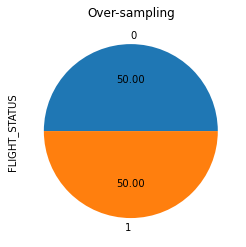

In [39]:
#Plotting the outcome of RandomOverSampler
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [40]:
X_res.shape, y_res.shape

((3546, 72), (3546,))

3546 rows of 73 columns

In [41]:
# Running a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=1, criterion = 'entropy', max_depth = 10)
dt.fit(X_res,y_res)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [42]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('FLIGHT_STATUS', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for CRS_DEP_TIME_6 is : 0.01479412016729374
The feature importance for CRS_DEP_TIME_7 is : 0.001412885853310352
The feature importance for CRS_DEP_TIME_8 is : 0.01610980418569683
The feature importance for CRS_DEP_TIME_9 is : 0.009930124031113213
The feature importance for CRS_DEP_TIME_10 is : 0.00293297818732214
The feature importance for CRS_DEP_TIME_11 is : 0.013148917780561159
The feature importance for CRS_DEP_TIME_12 is : 0.01603447962939593
The feature importance for CRS_DEP_TIME_13 is : 0.005628441835543792
The feature importance for CRS_DEP_TIME_14 is : 0.003655964262186838
The feature importance for CRS_DEP_TIME_15 is : 0.0073933082052665185
The feature importance for CRS_DEP_TIME_16 is : 0.02132892883276464
The feature importance for CRS_DEP_TIME_17 is : 0.004097216082490281
The feature importance for CRS_DEP_TIME_18 is : 0.011873937225046479
The feature importance for CRS_DEP_TIME_19 is : 0.0061274446367572885
The feature importance for CRS_DEP_TIME_2

In [43]:
# Creating a Dataframe for Feature Importance
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature_Importance'])
fi_df

,Feature,Feature_Importance
0,CRS_DEP_TIME_6,0.014794
1,CRS_DEP_TIME_7,0.001413
2,CRS_DEP_TIME_8,0.016110
3,CRS_DEP_TIME_9,0.009930
4,CRS_DEP_TIME_10,0.002933
...,...,...
67,DAY_MONTH_27,0.015420
68,DAY_MONTH_28,0.000000
69,DAY_MONTH_29,0.002172
70,DAY_MONTH_30,0.000000


In [44]:
# Ordering the feature importance data
fi_df = fi_df.sort_values('Feature_Importance', ascending = False).reset_index()

In [45]:
#Viewing the feature importance dataframe
fi_df

,index,Feature,Feature_Importance
0,17,DELAY_DEP_TIME_1,0.554096
1,20,CARRIER_DL,0.037341
2,32,WEATHER_0,0.021773
3,10,CRS_DEP_TIME_16,0.021329
4,55,DAY_MONTH_15,0.019539
...,...,...,...
67,47,DAY_MONTH_7,0.000000
68,56,DAY_MONTH_16,0.000000
69,49,DAY_MONTH_9,0.000000
70,30,ORIGIN_DCA,0.000000


In [46]:
#Filtering only feature_importance >0
fi_df = fi_df[fi_df['Feature_Importance'] > 0]

In [47]:
# Creating list of columns to build up the prediction model
columns_to_keep = fi_df['Feature']

In [48]:
columns_to_keep

0     DELAY_DEP_TIME_1
1           CARRIER_DL
2            WEATHER_0
3      CRS_DEP_TIME_16
4         DAY_MONTH_15
5           CARRIER_US
6           DAY_WEEK_2
7       CRS_DEP_TIME_8
8      CRS_DEP_TIME_12
9             DEST_LGA
10        DAY_MONTH_27
11          DAY_WEEK_5
12      CRS_DEP_TIME_6
13        DAY_MONTH_18
14     CRS_DEP_TIME_11
15     CRS_DEP_TIME_18
16        DAY_MONTH_14
17            DEST_EWR
18      CRS_DEP_TIME_9
19         DAY_MONTH_2
20          DAY_WEEK_4
21          DAY_WEEK_6
22         DAY_MONTH_6
23     CRS_DEP_TIME_15
24          DAY_WEEK_7
25          CARRIER_CO
26          CARRIER_RU
27     CRS_DEP_TIME_19
28        DAY_MONTH_31
29     CRS_DEP_TIME_13
30          CARRIER_DH
31         DAY_MONTH_5
32     CRS_DEP_TIME_20
33     CRS_DEP_TIME_17
34            DEST_JFK
35         DAY_MONTH_4
36        DAY_MONTH_13
37         DAY_MONTH_8
38     CRS_DEP_TIME_14
39          DAY_WEEK_1
40     CRS_DEP_TIME_10
41          DAY_WEEK_3
42        DAY_MONTH_17
43     CRS_

## Data partition

In [49]:
#Creating new X and y data matrices based on list of columns from feature importance 
#(X = predictor variables, y = outcome variable)
X=X_res[columns_to_keep]
y=y_res

In [50]:
#Ensuring int datatype of X and y 
y = y.astype(int)
X = X.astype(int)

In [51]:
X.shape,y.shape

((3546, 52), (3546,))

In [52]:
#Splitting the dataset into training set and test set, size = 0.4
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [53]:
train_X.shape, valid_X.shape, train_y.shape, valid_y.shape

((2127, 52), (1419, 52), (2127,), (1419,))

In [54]:
train_X.columns

Index(['DELAY_DEP_TIME_1', 'CARRIER_DL', 'WEATHER_0', 'CRS_DEP_TIME_16',
       'DAY_MONTH_15', 'CARRIER_US', 'DAY_WEEK_2', 'CRS_DEP_TIME_8',
       'CRS_DEP_TIME_12', 'DEST_LGA', 'DAY_MONTH_27', 'DAY_WEEK_5',
       'CRS_DEP_TIME_6', 'DAY_MONTH_18', 'CRS_DEP_TIME_11', 'CRS_DEP_TIME_18',
       'DAY_MONTH_14', 'DEST_EWR', 'CRS_DEP_TIME_9', 'DAY_MONTH_2',
       'DAY_WEEK_4', 'DAY_WEEK_6', 'DAY_MONTH_6', 'CRS_DEP_TIME_15',
       'DAY_WEEK_7', 'CARRIER_CO', 'CARRIER_RU', 'CRS_DEP_TIME_19',
       'DAY_MONTH_31', 'CRS_DEP_TIME_13', 'CARRIER_DH', 'DAY_MONTH_5',
       'CRS_DEP_TIME_20', 'CRS_DEP_TIME_17', 'DEST_JFK', 'DAY_MONTH_4',
       'DAY_MONTH_13', 'DAY_MONTH_8', 'CRS_DEP_TIME_14', 'DAY_WEEK_1',
       'CRS_DEP_TIME_10', 'DAY_WEEK_3', 'DAY_MONTH_17', 'CRS_DEP_TIME_21',
       'DAY_MONTH_29', 'DAY_MONTH_24', 'DAY_MONTH_23', 'CARRIER_MQ',
       'DAY_MONTH_22', 'CRS_DEP_TIME_7', 'ORIGIN_IAD', 'ORIGIN_BWI'],
      dtype='object')

## Logistic Regression model

In [55]:
# Fitting a logistic regression model
model1 = LogisticRegression(random_state=1,solver = 'lbfgs')
model1.fit(train_X, train_y)

LogisticRegression(random_state=1)

In [56]:
#Printing model's coefficients model1
print('Intercept:', model1.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'Coefficients': model1.coef_[0]}))

Intercept: [-0.35113586]
           Predictor  Coefficients
0   DELAY_DEP_TIME_1      3.013531
1         CARRIER_DL     -0.371715
2          WEATHER_0     -2.148256
3    CRS_DEP_TIME_16     -0.068419
4       DAY_MONTH_15      1.872199
5         CARRIER_US      0.351295
6         DAY_WEEK_2     -0.186735
7     CRS_DEP_TIME_8     -0.048610
8    CRS_DEP_TIME_12     -0.340917
9           DEST_LGA      0.071211
10      DAY_MONTH_27      1.879880
11        DAY_WEEK_5      0.526466
12    CRS_DEP_TIME_6     -0.301635
13      DAY_MONTH_18      1.694077
14   CRS_DEP_TIME_11     -0.633951
15   CRS_DEP_TIME_18     -0.667823
16      DAY_MONTH_14     -0.044063
17          DEST_EWR      0.136515
18    CRS_DEP_TIME_9     -0.946018
19       DAY_MONTH_2     -1.296013
20        DAY_WEEK_4     -0.641265
21        DAY_WEEK_6     -0.378895
22       DAY_MONTH_6     -1.059919
23   CRS_DEP_TIME_15      0.576831
24        DAY_WEEK_7      0.089312
25        CARRIER_CO      0.726720
26        CARRIER_RU      0.55

In [57]:
# Accuracy on Train
print("The Training Accuracy is: ", model1.score(train_X, train_y))

# Accuracy on Test
print("The Testing Accuracy is: ", model1.score(valid_X, valid_y))

The Training Accuracy is:  0.8307475317348378
The Testing Accuracy is:  0.8005637773079634


In [58]:
# training confusion matrix
classificationSummary(train_y, model1.predict(train_X))

Confusion Matrix (Accuracy 0.8307)

       Prediction
Actual   0   1
     0 896 167
     1 193 871


In [59]:
# validation confusion matrix
classificationSummary(valid_y, model1.predict(valid_X))

Confusion Matrix (Accuracy 0.8006)

       Prediction
Actual   0   1
     0 590 120
     1 163 546


In [60]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

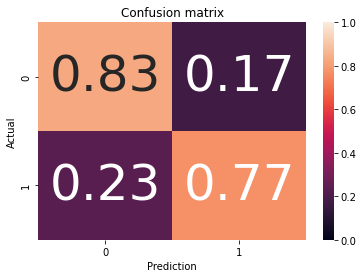

In [61]:
# Plotting Confusion Matrix

cm1 = confusion_matrix(valid_y, model1.predict(valid_X))
cm1_norm = cm1 / cm1.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm1_norm, classes = model1.classes_, title='Confusion matrix')

In [62]:
cm1

array([[590, 120],
       [163, 546]], dtype=int64)

In [63]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP1 = cm1.sum(axis=0) - np.diag(cm1)
FN1 = cm1.sum(axis=1) - np.diag(cm1)
TP1 = np.diag(cm1)
TN1 = cm1.sum() - (FP1 + FN1 + TP1)

In [64]:
FP1, FN1, TP1, TN1

(array([163, 120], dtype=int64),
 array([120, 163], dtype=int64),
 array([590, 546], dtype=int64),
 array([546, 590], dtype=int64))

In [65]:
# True positive rate
TPR1 = TP1 / (TP1 + FN1)
print("The True Positive Rate is:", TPR1)

# Precision rate
PPV1 = TP1 / (TP1 + FP1)
print("The Precision is:", PPV1)

# False positive rate
FPR1 = FP1 / (FP1 + TN1)
print("The False positive rate is:", FPR1)

The True Positive Rate is: [0.83098592 0.77009873]
The Precision is: [0.78353254 0.81981982]
The False positive rate is: [0.22990127 0.16901408]


## Naïve Bayes model

In [66]:
# Fitting a Naïve Bayes model
model2 = MultinomialNB(alpha=0.01)
model2.fit(train_X, train_y)

MultinomialNB(alpha=0.01)

In [67]:
# Accuracy on Train
print("The Training Accuracy is: ", model2.score(train_X, train_y))

# Accuracy on Test
print("The Testing Accuracy is: ", model2.score(valid_X, valid_y))

The Training Accuracy is:  0.77103902209685
The Testing Accuracy is:  0.751937984496124


In [68]:
# training confusion matrix
classificationSummary(train_y, model2.predict(train_X))

Confusion Matrix (Accuracy 0.7710)

       Prediction
Actual   0   1
     0 783 280
     1 207 857


In [69]:
# validation confusion matrix
classificationSummary(valid_y, model2.predict(valid_X))

Confusion Matrix (Accuracy 0.7519)

       Prediction
Actual   0   1
     0 513 197
     1 155 554


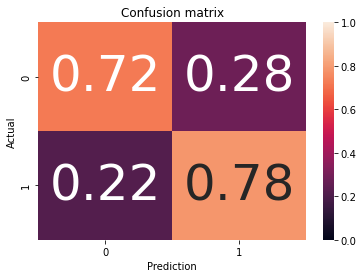

In [70]:
# Plotting Confusion Matrix

cm2 = confusion_matrix(valid_y, model2.predict(valid_X))
cm2_norm = cm2 / cm2.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm2_norm, classes = model2.classes_, title='Confusion matrix')

In [71]:
cm2

array([[513, 197],
       [155, 554]], dtype=int64)

In [72]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP2 = cm2.sum(axis=0) - np.diag(cm2)
FN2 = cm2.sum(axis=1) - np.diag(cm2)
TP2 = np.diag(cm2)
TN2 = cm2.sum() - (FP2 + FN2 + TP2)

In [73]:
FP2, FN2, TP2, TN2

(array([155, 197], dtype=int64),
 array([197, 155], dtype=int64),
 array([513, 554], dtype=int64),
 array([554, 513], dtype=int64))

In [74]:
# True positive rate
TPR2 = TP2 / (TP2 + FN2)
print("The True Positive Rate is:", TPR2)

# Precision rate
PPV2 = TP2 / (TP2 + FP2)
print("The Precision is:", PPV2)

# False positive rate
FPR2 = FP2 / (FP2 + TN2)
print("The False positive rate is:", FPR2)

The True Positive Rate is: [0.72253521 0.78138223]
The Precision is: [0.76796407 0.73768309]
The False positive rate is: [0.21861777 0.27746479]


## Decision Tree model

In [75]:
# Fitting a decision tree model
model3 = DecisionTreeClassifier(random_state=1, max_depth=1, criterion='gini')
model3.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [76]:
# Accuracy on Train
print("The Training Accuracy is: ", model3.score(train_X, train_y))

# Accuracy on Test
print("The Testing Accuracy is: ", model3.score(valid_X, valid_y))

The Training Accuracy is:  0.8213446168312176
The Testing Accuracy is:  0.7998590556730092


In [77]:
# training confusion matrix
classificationSummary(train_y, model3.predict(train_X))

Confusion Matrix (Accuracy 0.8213)

       Prediction
Actual   0   1
     0 880 183
     1 197 867


In [78]:
# validation confusion matrix
classificationSummary(valid_y, model3.predict(valid_X))

Confusion Matrix (Accuracy 0.7999)

       Prediction
Actual   0   1
     0 586 124
     1 160 549


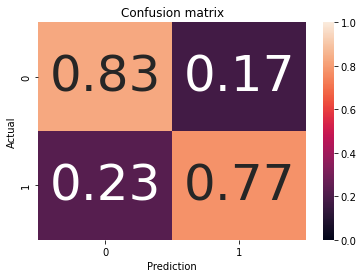

In [79]:
# Plotting Confusion Matrix

cm3 = confusion_matrix(valid_y, model3.predict(valid_X))
cm3_norm = cm3 / cm3.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm3_norm, classes = model3.classes_, title='Confusion matrix')

In [80]:
cm3

array([[586, 124],
       [160, 549]], dtype=int64)

In [81]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP3 = cm3.sum(axis=0) - np.diag(cm3)
FN3 = cm3.sum(axis=1) - np.diag(cm3)
TP3 = np.diag(cm3)
TN3 = cm3.sum() - (FP3 + FN3 + TP3)

In [82]:
FP3, FN3,TP3, TN3

(array([160, 124], dtype=int64),
 array([124, 160], dtype=int64),
 array([586, 549], dtype=int64),
 array([549, 586], dtype=int64))

In [83]:
# True positive rate
TPR3 = TP3 / (TP3 + FN3)
print("The True Positive Rate is:", TPR3)

# Precision rate
PPV3 = TP3 / (TP3 + FP3)
print("The Precision is:", PPV3)

# False positive rate
FPR3 = FP3 / (FP3 + TN3)
print("The False positive rate is:", FPR3)

The True Positive Rate is: [0.82535211 0.77433004]
The Precision is: [0.78552279 0.81575037]
The False positive rate is: [0.22566996 0.17464789]


## Compare model performance

Based on confusion matrix and True positive rate, Precision rate, False positive rate, model1 which is built by using logistic regression model is the optimal model for flight delay prediction.

## Use Testing Data

In [84]:
# Loading the test data
test_data = pd.read_csv('FlightDelaysTestingData.csv')

In [85]:
#Viewing dataset
test_data

,CRS_DEP_TIME,DELAY_DEP_TIME,CARRIER,DEST,ORIGIN,WEATHER,DAY_WEEK,DAY_MONTH,FLIGHT_STATUS
0,7,0,AA,JFK,BWI,1,2,5,NaN
1,9,1,CO,EWR,DCA,1,4,13,NaN
2,10,0,DH,LGA,IAD,0,5,14,NaN
3,15,1,DL,LGA,DCA,0,7,10,NaN
4,12,0,EV,EWR,IAD,0,6,9,NaN


In [86]:
#Transforming test_data variables to a dataframe of dummy variables
new_test_data = pd.get_dummies(test_data, columns = features)

In [87]:
#Removing outcome variable
new_test_data.drop(['FLIGHT_STATUS'], axis=1, inplace=True)

In [88]:
#Viewing dataset
test_data

,CRS_DEP_TIME,DELAY_DEP_TIME,CARRIER,DEST,ORIGIN,WEATHER,DAY_WEEK,DAY_MONTH,FLIGHT_STATUS
0,7,0,AA,JFK,BWI,1,2,5,NaN
1,9,1,CO,EWR,DCA,1,4,13,NaN
2,10,0,DH,LGA,IAD,0,5,14,NaN
3,15,1,DL,LGA,DCA,0,7,10,NaN
4,12,0,EV,EWR,IAD,0,6,9,NaN


In [89]:
#Merging X_test_data to valid_X
X_test_data = pd.DataFrame(valid_X.append(new_test_data))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4172\807650965.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test_data = pd.DataFrame(valid_X.append(new_test_data))


In [90]:
#Viewing dataset
X_test_data

,DELAY_DEP_TIME_1,CARRIER_DL,WEATHER_0,CRS_DEP_TIME_16,DAY_MONTH_15,CARRIER_US,DAY_WEEK_2,CRS_DEP_TIME_8,CRS_DEP_TIME_12,DEST_LGA,...,CRS_DEP_TIME_7,ORIGIN_IAD,ORIGIN_BWI,DELAY_DEP_TIME_0,CARRIER_AA,CARRIER_EV,ORIGIN_DCA,WEATHER_1,DAY_MONTH_9,DAY_MONTH_10
1457,0,1,1,0.0,0.0,0.0,0,0.0,0,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3350,1,0,1,0.0,0.0,0.0,0,0.0,0,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2879,1,0,1,0.0,0.0,0.0,0,0.0,0,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,0,0,1,0.0,0.0,0.0,0,0.0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,0,1,1,0.0,0.0,0.0,0,1.0,0,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,NaN,NaN,NaN,1,NaN,0,0,...,1,0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,NaN,NaN,NaN,0,NaN,0,0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,0,1,NaN,NaN,NaN,0,NaN,0,1,...,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,NaN,NaN,NaN,0,NaN,0,1,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [91]:
#Viewing column names
X_test_data.columns

Index(['DELAY_DEP_TIME_1', 'CARRIER_DL', 'WEATHER_0', 'CRS_DEP_TIME_16',
       'DAY_MONTH_15', 'CARRIER_US', 'DAY_WEEK_2', 'CRS_DEP_TIME_8',
       'CRS_DEP_TIME_12', 'DEST_LGA', 'DAY_MONTH_27', 'DAY_WEEK_5',
       'CRS_DEP_TIME_6', 'DAY_MONTH_18', 'CRS_DEP_TIME_11', 'CRS_DEP_TIME_18',
       'DAY_MONTH_14', 'DEST_EWR', 'CRS_DEP_TIME_9', 'DAY_MONTH_2',
       'DAY_WEEK_4', 'DAY_WEEK_6', 'DAY_MONTH_6', 'CRS_DEP_TIME_15',
       'DAY_WEEK_7', 'CARRIER_CO', 'CARRIER_RU', 'CRS_DEP_TIME_19',
       'DAY_MONTH_31', 'CRS_DEP_TIME_13', 'CARRIER_DH', 'DAY_MONTH_5',
       'CRS_DEP_TIME_20', 'CRS_DEP_TIME_17', 'DEST_JFK', 'DAY_MONTH_4',
       'DAY_MONTH_13', 'DAY_MONTH_8', 'CRS_DEP_TIME_14', 'DAY_WEEK_1',
       'CRS_DEP_TIME_10', 'DAY_WEEK_3', 'DAY_MONTH_17', 'CRS_DEP_TIME_21',
       'DAY_MONTH_29', 'DAY_MONTH_24', 'DAY_MONTH_23', 'CARRIER_MQ',
       'DAY_MONTH_22', 'CRS_DEP_TIME_7', 'ORIGIN_IAD', 'ORIGIN_BWI',
       'DELAY_DEP_TIME_0', 'CARRIER_AA', 'CARRIER_EV', 'ORIGIN_DCA',
       'WE

In [92]:
# Dropping columns not in the model1
X_test_data.drop(['DELAY_DEP_TIME_0', 'CARRIER_AA', 'CARRIER_EV', 'ORIGIN_DCA',
       'WEATHER_1', 'DAY_MONTH_9', 'DAY_MONTH_10'], axis=1, inplace=True)

In [93]:
#Keeping only the 5 new observations
X_test_data = pd.DataFrame(X_test_data.tail(5))

In [94]:
# Replacing nan values by 0
X_test_data = X_test_data.replace(np.nan, 0)
X_test_data = X_test_data.astype(int)

In [95]:
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   DELAY_DEP_TIME_1  5 non-null      int32
 1   CARRIER_DL        5 non-null      int32
 2   WEATHER_0         5 non-null      int32
 3   CRS_DEP_TIME_16   5 non-null      int32
 4   DAY_MONTH_15      5 non-null      int32
 5   CARRIER_US        5 non-null      int32
 6   DAY_WEEK_2        5 non-null      int32
 7   CRS_DEP_TIME_8    5 non-null      int32
 8   CRS_DEP_TIME_12   5 non-null      int32
 9   DEST_LGA          5 non-null      int32
 10  DAY_MONTH_27      5 non-null      int32
 11  DAY_WEEK_5        5 non-null      int32
 12  CRS_DEP_TIME_6    5 non-null      int32
 13  DAY_MONTH_18      5 non-null      int32
 14  CRS_DEP_TIME_11   5 non-null      int32
 15  CRS_DEP_TIME_18   5 non-null      int32
 16  DAY_MONTH_14      5 non-null      int32
 17  DEST_EWR          5 non-null      int32

In [96]:
X_test_data

,DELAY_DEP_TIME_1,CARRIER_DL,WEATHER_0,CRS_DEP_TIME_16,DAY_MONTH_15,CARRIER_US,DAY_WEEK_2,CRS_DEP_TIME_8,CRS_DEP_TIME_12,DEST_LGA,...,DAY_MONTH_17,CRS_DEP_TIME_21,DAY_MONTH_29,DAY_MONTH_24,DAY_MONTH_23,CARRIER_MQ,DAY_MONTH_22,CRS_DEP_TIME_7,ORIGIN_IAD,ORIGIN_BWI
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [97]:
#Using the optimal model to predict X_test_data
model1.predict(X_test_data)

array([1, 1, 0, 1, 0])

Outcome 'delay', 'delay', 'ontime', 'delay', 'ontime'